**Домашнее задание**  

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.


Минимальный объем выборки можно найти по формуле:  
$n = (\frac {Z_\alpha \cdot \sigma}{\varDelta})^2 = (\frac {Z_\alpha}{\varDelta})^2 \cdot \sigma^2$.   
При $\beta = 0.95$ значение $Z_\alpha = 1,96$.  
Отсюда:  
$n = (\frac {1,96}{3})^2 \cdot 225 = 96,04$.  
Ну и, поскольку, n должно быть целым, ответом будет n = 97.

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьюдента, что различия между выборками незначительно, если уровень значимости равен 0.001.

```python
population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165
```

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, HTML

# тут, вероятно, перепутаны значения: loc = среднее, scale - отклонение, иначе рост отрицательный
population_men = stats.norm.rvs(loc=171,scale=19,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165,scale=16,size=12000)  # Выборка женщин со средним ростом 165

t, pvalue = stats.ttest_ind(population_men, population_women)
print("Нулевая гипотеза: выборки имеют одинаковые средние.")
print(f"Значение p-value = {pvalue}.")
print("Это значение существенно меньше уровня значимости α = 0.001.")
print("Поэтому отклоняем нулевую гипотезу.")
print("Это говорит о том, что выборки имеют разные средние.")
print("А значит, при p-value = α различие между выборками было бы незначительным.")

Нулевая гипотеза: выборки имеют одинаковые средние.
Значение p-value = 9.769915790702509e-247.
Это значение существенно меньше уровня значимости α = 0.001.
Поэтому отклоняем нулевую гипотезу.
Это говорит о том, что выборки имеют разные средние.
А значит, при p-value = α различие между выборками было бы незначительным.


3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

Минимальный объем выборки можно найти по формуле:  
$n = (\frac {Z_\alpha \cdot \sigma}{\varDelta})^2$.   
При $\beta = 0.95$ значение $Z_\alpha = 1,96$.  
Отсюда:  
$n = (\frac {1,96 \cdot 150}{50})^2 = 34,5744$.  
Ну и, поскольку, n должно быть целым, ответом будет n = 35.

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

```python
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
oddsratio, pvalue = sp.stats.fisher_exact('Таблица')  # Возможно вам пригодится эта функция.
```

In [2]:
table = [[25,36],[15,44]]
observations = pd.DataFrame(table,
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])

display(HTML(observations.to_html()))

print("Нулевая гипотеза: волшебник настоящий.")

print("По критерию Фишера:")
oddsratio, pvalue = sp.stats.fisher_exact(table)  # Возможно вам пригодится эта функция.
print(f"\tp-value = {pvalue}.")
if pvalue < 0.05:
    print("\tВывод: волшебник - мошенник.")
else:
    print("\tВывод: волшебник настоящий.")
    
print("По критерию Пирсона:")
chi2, pvalue, do,expected = sp.stats.chi2_contingency(table)
print(f"\tp-value = {pvalue}.")
if pvalue < 0.05:
    print("\tВывод: волшебник - мошенник.")
else:
    print("\tВывод: волшебник настоящий.")

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


Нулевая гипотеза: волшебник настоящий.
По критерию Фишера:
	p-value = 0.08323639416753109.
	Вывод: волшебник настоящий.
По критерию Пирсона:
	p-value = 0.10653453263099501.
	Вывод: волшебник настоящий.


Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:
```python
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]
```

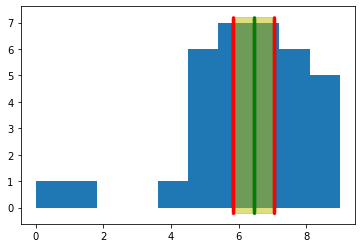

Доверительный интервал: (5.843062450077532; 7.039290491098939).


In [3]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence) / 2, n)
    return m - h, m, m + h

data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

ymin = -0.2
ymax = 7.2
conf = mean_confidence_interval(data, 0.9)
x1 = [conf[0] for i in range(1000)]
x2 = [conf[2] for i in range(1000)]
m = [conf[1] for i in range(1000)]
y = np.linspace(ymin, ymax, 1000)

fig, ax = plt.subplots()
plt.hist(data)
plt.scatter(x1, y, c="r", zorder=3, s=5, alpha=0.5)
plt.scatter(x2, y, c="r", zorder=3, s=5, alpha=0.5)
plt.scatter(m, y, c="g", zorder=3, s=5, alpha=0.5)
rect = patches.Rectangle((conf[0], ymin), conf[2] - conf[0], ymax - ymin, linewidth=1, edgecolor="y",facecolor="y", zorder=2, alpha=0.5)
ax.add_patch(rect)
plt.show()

print(f"Доверительный интервал: ({conf[0]}; {conf[2]}).")

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

```python
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]
```

Нулевая гипотеза: выборки принадлежат одному множеству.
p-value = 2.1159475572725764e-11.
Выборки не принадлежат одному множеству.


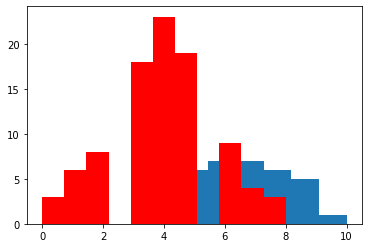

In [4]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

print("Нулевая гипотеза: выборки принадлежат одному множеству.")
t, pvalue = stats.ttest_ind(data_1, data_2)
print(f"p-value = {pvalue}.")
if pvalue < 0.05:
    print("Выборки не принадлежат одному множеству.")
else:
    print("Выборки принадлежат одному множеству.")

plt.hist(data_1, bins=11)
plt.hist(data_2, bins=11, color="r")
plt.show()

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Решение:**  
Все зависит от уровня значимости α. Если p-value оказалось меньше α, то отклоняем нулевую гипотезу, т.е. распределение не будет нормальным. В противном случае, мы не можем отклонить нулевую гипотезу. В общем случае за уровень значимости принимается значение α = 0.05, тогда распределение нельзя считать нормальным.

8. Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы?

```python
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)
```

Нулевая гипотеза: эффективность не различается.
p-value = 0.740034005650458.
Эффективность мало различается.
При p-value = α = 0.05 различия были бы уже значимыми.


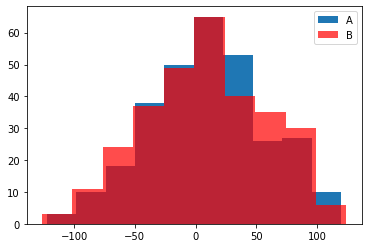

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

print("Нулевая гипотеза: эффективность не различается.")
t, pvalue = stats.ttest_ind(A, B)
print(f"p-value = {pvalue}.")
if pvalue < 0.05:
    print("Эффективность различается.")
else:
    print("Эффективность мало различается.")
    
print("При p-value = α = 0.05 различия были бы уже значимыми.")

plt.hist(A, label="A")
plt.hist(B, label="B", color="r", alpha=0.7)
plt.legend()
plt.show()